# Data Exploration and PreProcessing

## Setup libraries, functions, and variables

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage import convolve
from glob import glob
import os
import random
import csv
from sklearn.model_selection import train_test_split
import pandas
import imageio.v3 as iio
import cv2 as cv

import project_lib as plib

In [14]:
import importlib
importlib.reload(plib)

<module 'project_lib' from '/home/rakesh/Desktop/w281/w281-cv-final-project/code/project_lib.py'>

## Load data

In [6]:
# Regenerate metadata CSV file
plib.generate_metadata_csv()

The Metadata file exist; cleaning
Creating metadata


In [7]:
## Generate Train Test Val split.
data = plib.get_metadata()

train, test, val = plib.get_train_test_val_split(data)
print(len(train), len(test), len(val))

16286 4343 1086


# Data Exploration

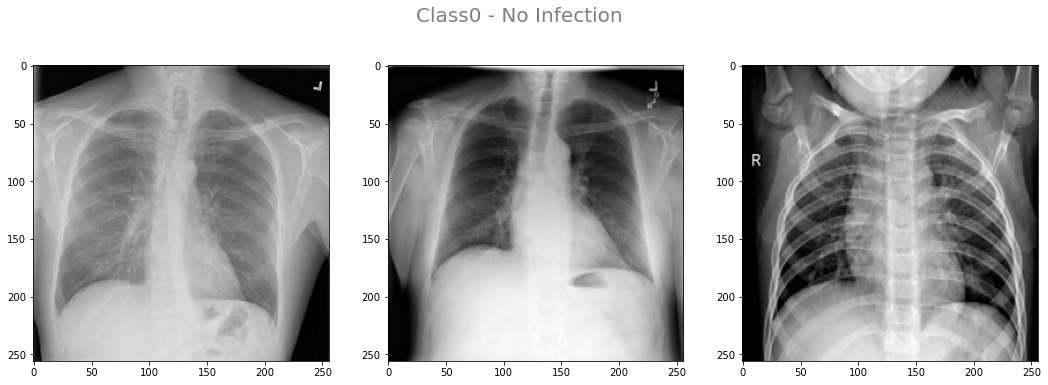

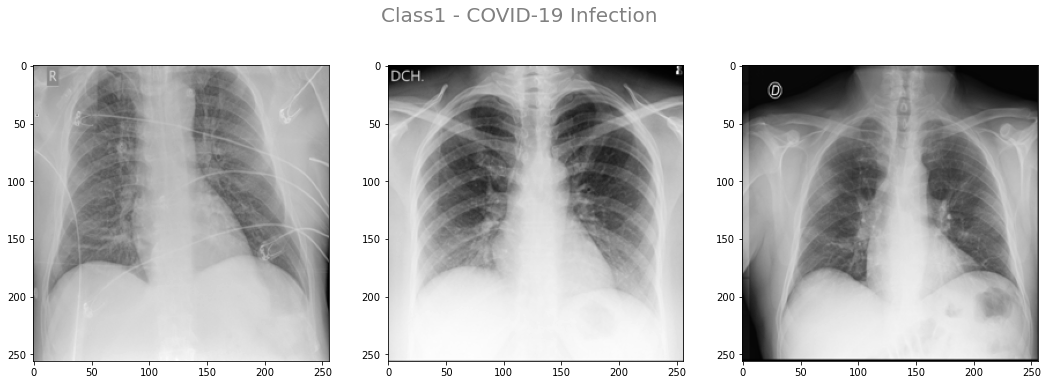

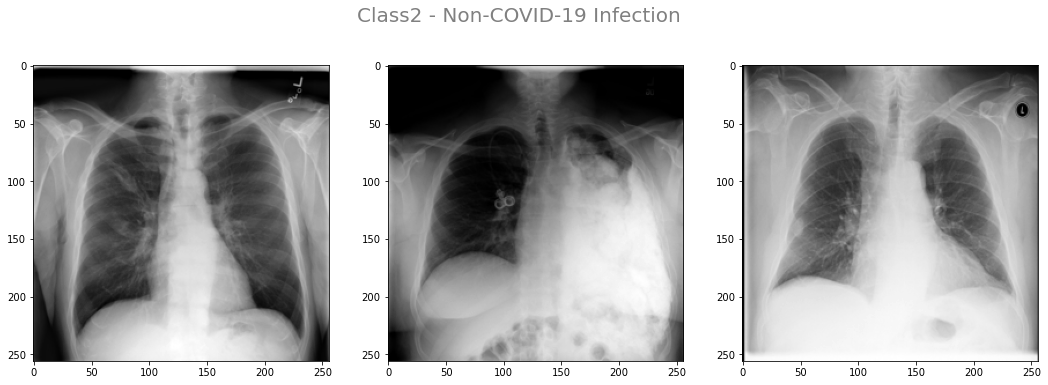

In [8]:
plib.plot_images(plib.fetch_images(val[val['class']==0].head(3)), "Class0 - No Infection")
plib.plot_images(plib.fetch_images(val[val['class']==1].head(3)), "Class1 - COVID-19 Infection")
plib.plot_images(plib.fetch_images(val[val['class']==2].head(3)), "Class2 - Non-COVID-19 Infection")

# Masked Lung Images

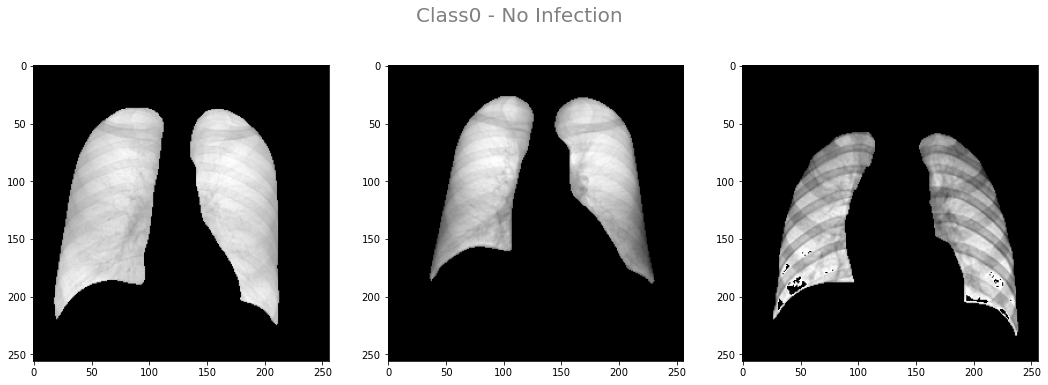

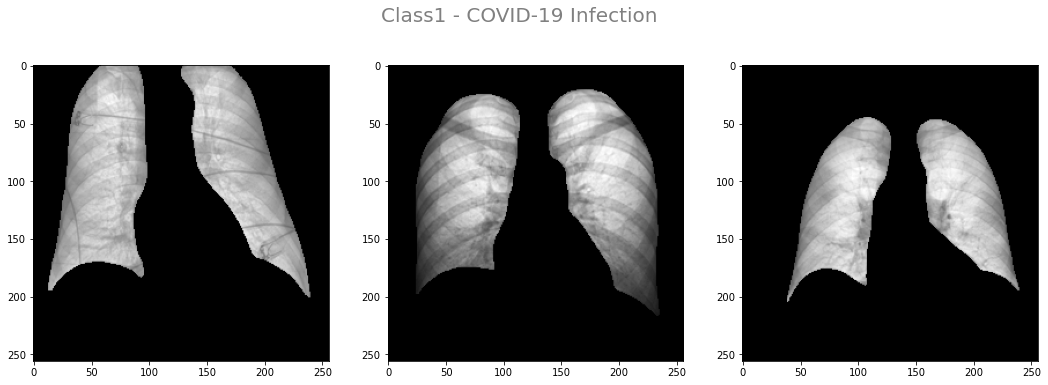

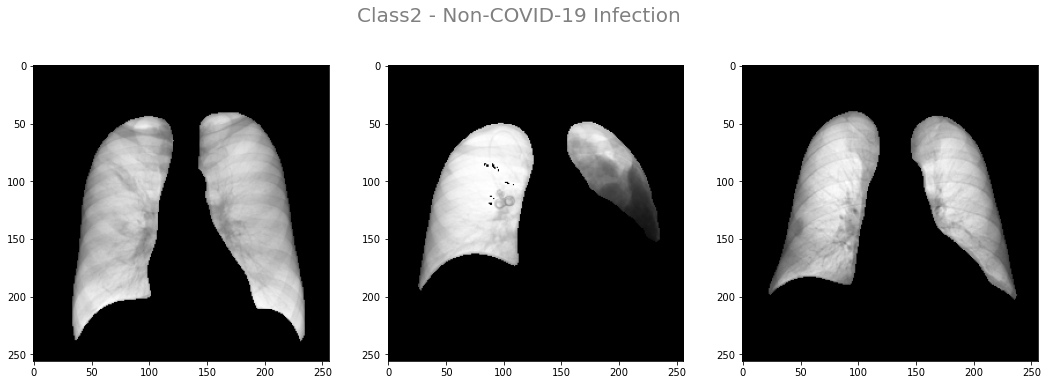

In [9]:
plib.plot_images(plib.fetch_lung_masked_images(val[val['class']==0].head(3)), "Class0 - No Infection")
plib.plot_images(plib.fetch_lung_masked_images(val[val['class']==1].head(3)), "Class1 - COVID-19 Infection")
plib.plot_images(plib.fetch_lung_masked_images(val[val['class']==2].head(3)), "Class2 - Non-COVID-19 Infection")

# Pre Processing

## Denoising

- Use `fastNlMeansDenoising` to remove noise from images and smoothen the image out. 
- Decide between CLAHE and Histogram equalization denoising.

### Notes

1. Images shown below are in the following order - __[Original, Denoised, Histogram-Equalized, CLAHE-Enhanced, Denoised-Histogram-Enhanced, Denoised-CLAHE enhanced}__

2. __Denoising images seems to remove too many details about images__. A low Denoising-threashold `h` (<=2) is better. Models need to be evaluated based on different denoising.

3. CLAHE is better are highlighting interesting features in images without blowing out the ribs in the images.

4. 

### Histogram Equalization

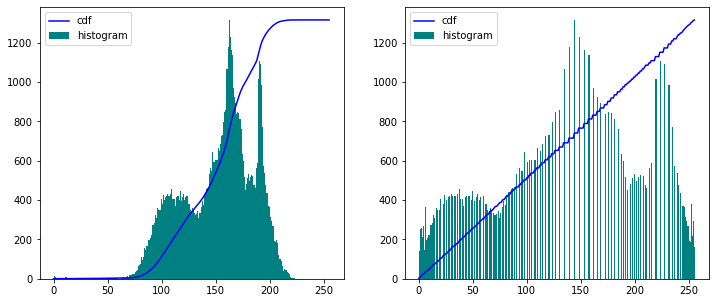

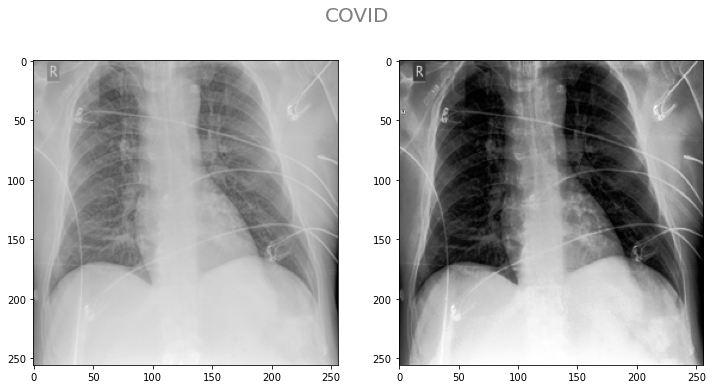

In [32]:
imgs_to_process = plib.fetch_images(val[val['class']==1].head(1))
test_img = imgs_to_process[0].get_data()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

hist,bins = np.histogram(test_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
ax1.plot(cdf_normalized, color = 'b')
ax1.hist(test_img.flatten(),256,[0,256], color = 'teal')
#plt.xlim([0,256])
ax1.legend(('cdf','histogram'), loc = 'upper left')

equ = cv.equalizeHist(test_img)

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
ax2.plot(cdf_normalized, color = 'b')
ax2.hist(equ.flatten(),256,[0,256], color = 'teal')
#ax2.xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

plib.plot_images([test_img, equ], "COVID", wrapped=False)

### CLAHE

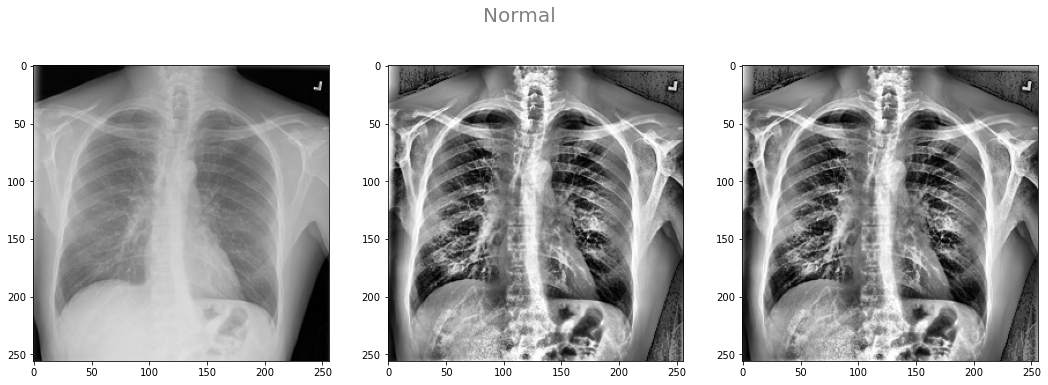

In [33]:
importlib.reload(plib)

denoising_h = 2

clahe = cv.createCLAHE()

imgs_to_process = plib.fetch_images(val[val['class']==0].head(1))
test_img = imgs_to_process[0].get_data()
denoised = cv.fastNlMeansDenoising(test_img, h=denoising_h)
histogram_enhanced = cv.equalizeHist(test_img)
clahe_enhanced = clahe.apply(test_img)
denoised_histogram_enhanced = cv.fastNlMeansDenoising(histogram_enhanced, h=denoising_h)
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

plib.plot_images([test_img, clahe_enhanced, denoised_clahe_enhanced], "Normal", wrapped=False)

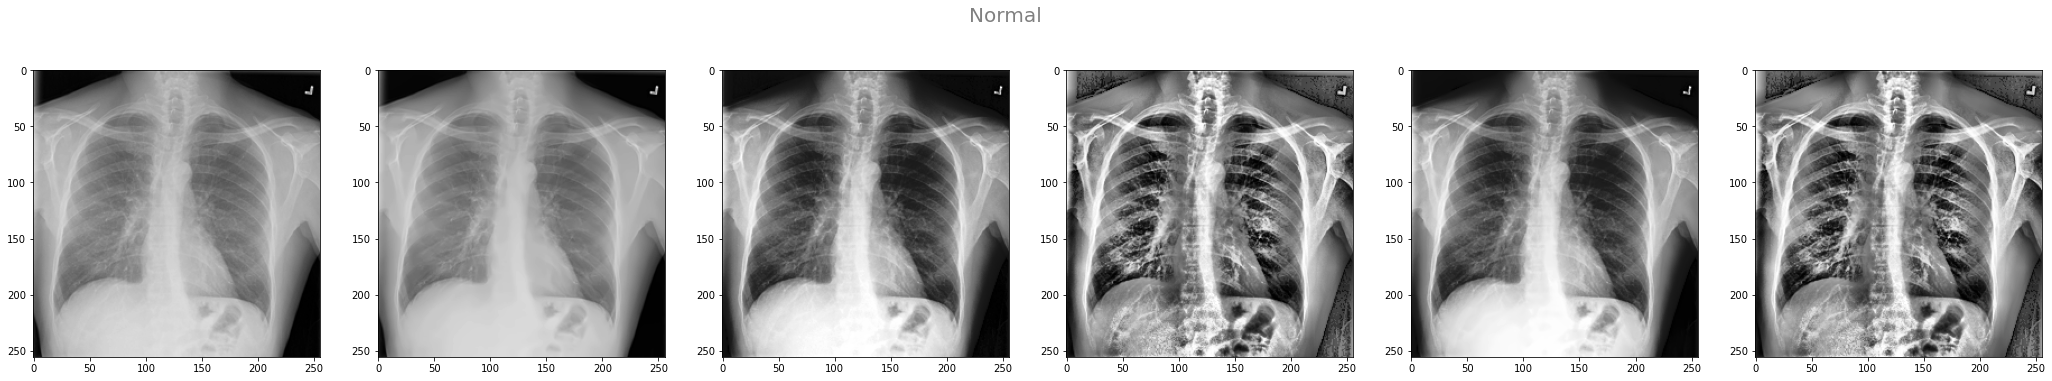

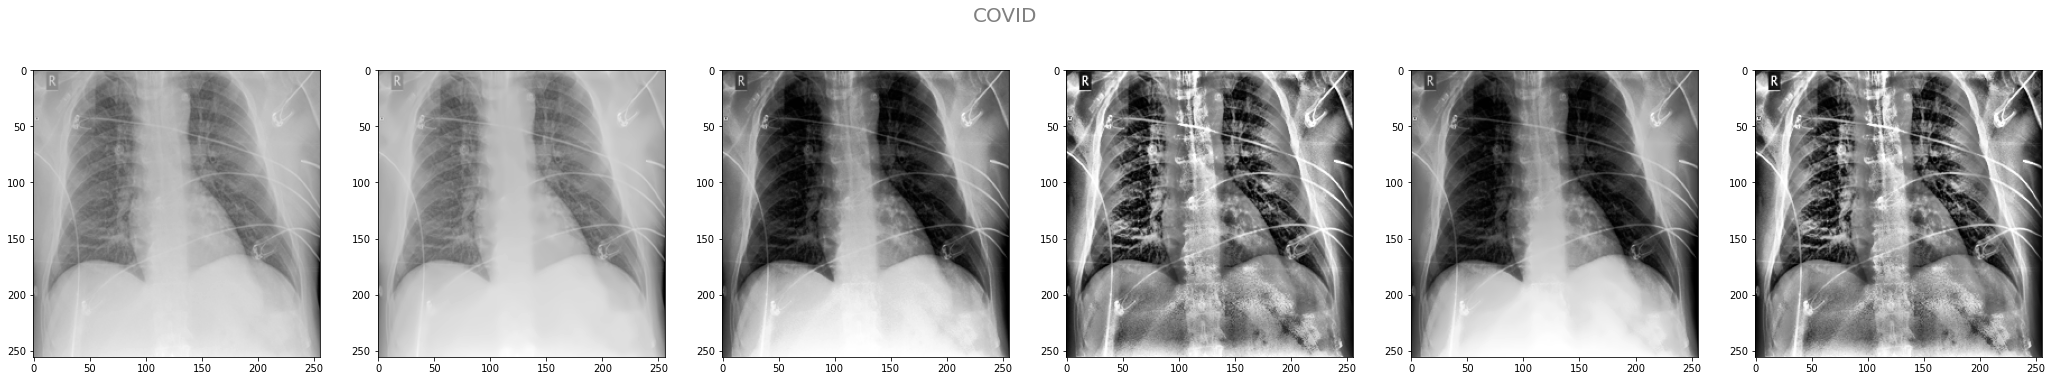

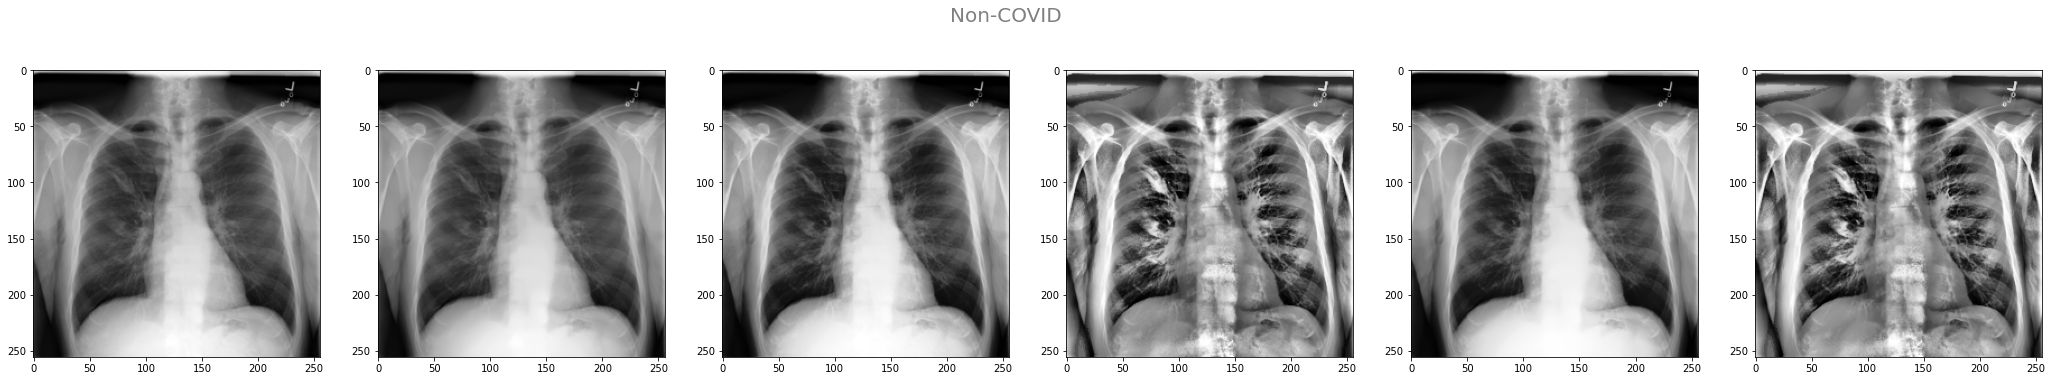

In [17]:
importlib.reload(plib)

denoising_h = 2

clahe = cv.createCLAHE()

imgs_to_process = plib.fetch_images(val[val['class']==0].head(1))
test_img = imgs_to_process[0].get_data()
denoised = cv.fastNlMeansDenoising(test_img, h=denoising_h)
histogram_enhanced = cv.equalizeHist(test_img)
clahe_enhanced = clahe.apply(test_img)
denoised_histogram_enhanced = cv.fastNlMeansDenoising(histogram_enhanced, h=denoising_h)
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

plib.plot_images([test_img, denoised, histogram_enhanced, clahe_enhanced, denoised_histogram_enhanced, denoised_clahe_enhanced], "Normal", wrapped=False)

imgs_to_process = plib.fetch_images(val[val['class']==1].head(1))
test_img = imgs_to_process[0].get_data()
denoised = cv.fastNlMeansDenoising(test_img, h=denoising_h)
histogram_enhanced = cv.equalizeHist(test_img)
clahe_enhanced = clahe.apply(test_img)
denoised_histogram_enhanced = cv.fastNlMeansDenoising(histogram_enhanced, h=denoising_h)
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

plib.plot_images([test_img, denoised, histogram_enhanced, clahe_enhanced, denoised_histogram_enhanced, denoised_clahe_enhanced], "COVID", wrapped=False)

imgs_to_process = plib.fetch_images(val[val['class']==2].head(1))
test_img = imgs_to_process[0].get_data()
denoised = cv.fastNlMeansDenoising(test_img, h=denoising_h)
histogram_enhanced = cv.equalizeHist(test_img)
clahe_enhanced = clahe.apply(test_img)
denoised_histogram_enhanced = cv.fastNlMeansDenoising(histogram_enhanced, h=denoising_h)
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

plib.plot_images([test_img, denoised, histogram_enhanced, clahe_enhanced, denoised_histogram_enhanced, denoised_clahe_enhanced], "Non-COVID", wrapped=False)

## Local Normalization

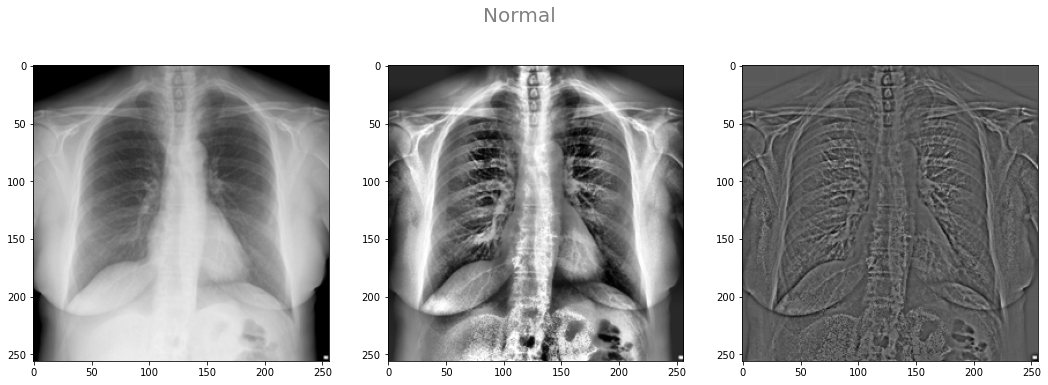

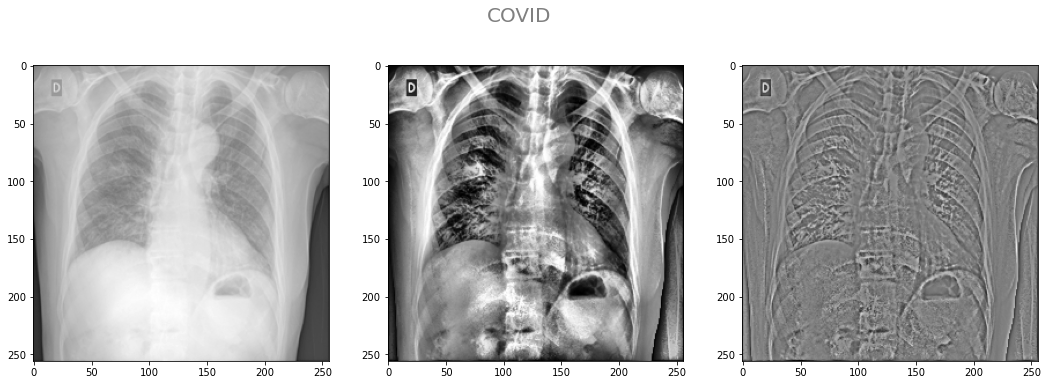

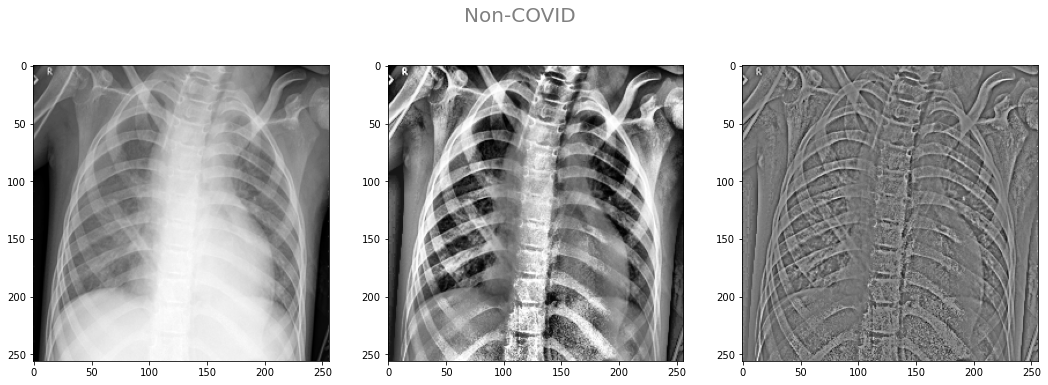

In [24]:
denoising_h = 2

clahe = cv.createCLAHE()

imgs_to_process = plib.fetch_images(val[val['class']==0].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
local_norm_clahe = plib.local_normalize_img(clahe_enhanced)
#denoised_local_norm_clahe = cv.fastNlMeansDenoising(local_norm_clahe, h=denoising_h)


plib.plot_images([imgs_to_process[0], clahe_enhanced, local_norm_clahe], "Normal")

imgs_to_process = plib.fetch_images(val[val['class']==1].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
local_norm_clahe = plib.local_normalize_img(clahe_enhanced)
#denoised_local_norm_clahe = cv.fastNlMeansDenoising(local_norm_clahe, h=denoising_h)


plib.plot_images([imgs_to_process[0], clahe_enhanced, local_norm_clahe], "COVID")

imgs_to_process = plib.fetch_images(val[val['class']==2].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
local_norm_clahe = plib.local_normalize_img(clahe_enhanced)
#denoised_local_norm_clahe = cv.fastNlMeansDenoising(local_norm_clahe, h=denoising_h)


plib.plot_images([imgs_to_process[0], clahe_enhanced, local_norm_clahe], "Non-COVID")

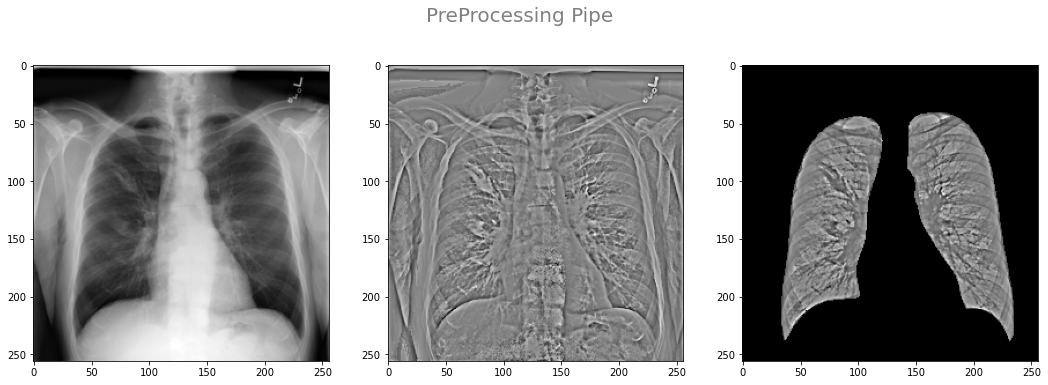

In [52]:
import project_lib as plib
img_rec = val[val['class']==2].head(1)
imgs_to_process = plib.fetch_images(img_rec)
prep_img = plib.get_preprocessed_img(imgs_to_process[0])
test = plib.do_lung_mask_images(img_rec, [prep_img])

plib.plot_images([imgs_to_process[0], prep_img, test[0]], "PreProcessing Pipe")

# Fourier Analysis

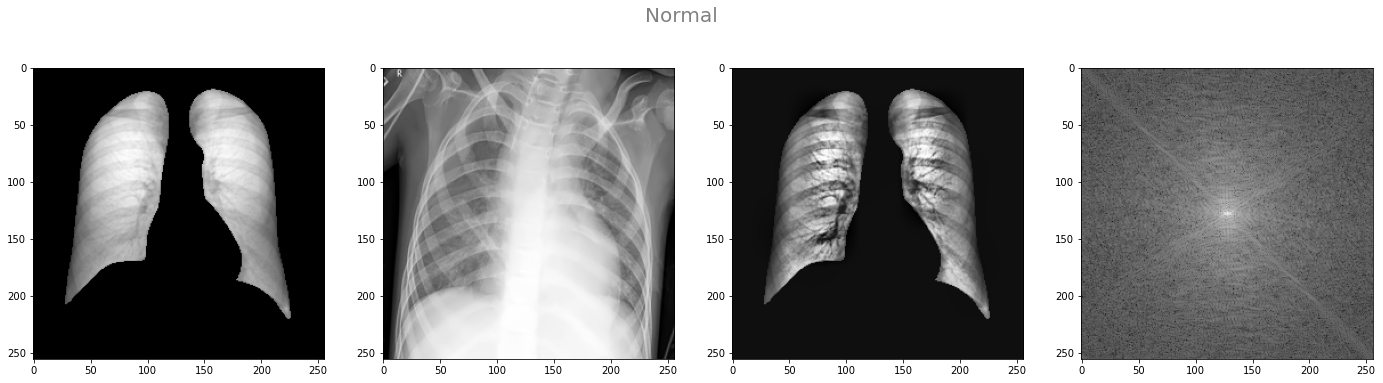

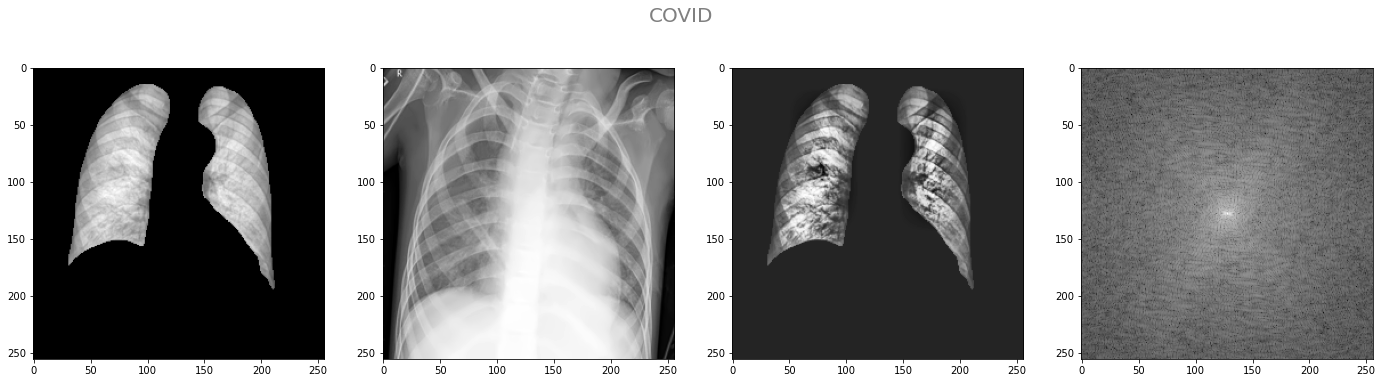

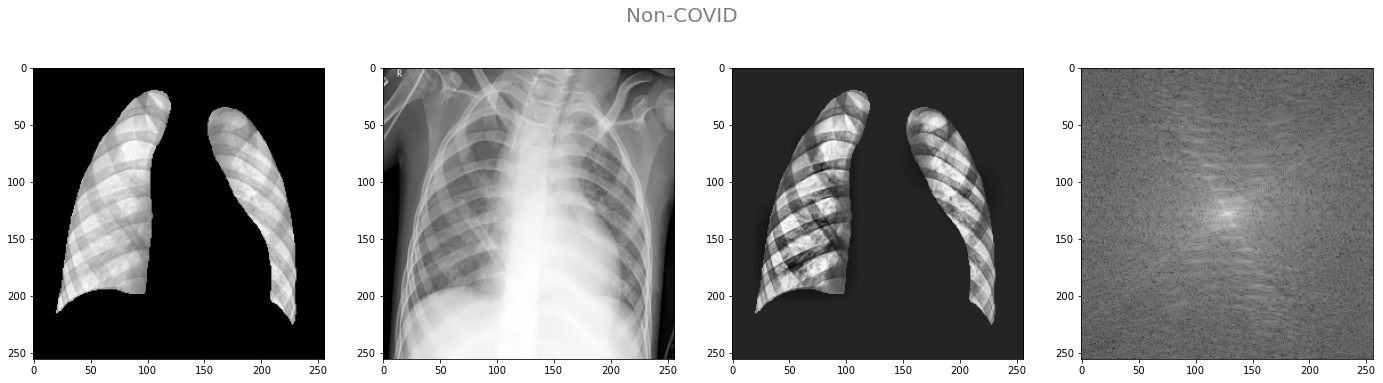

In [25]:
denoising_h = 2

clahe = cv.createCLAHE()

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)


f = np.fft.fft2(denoised_clahe_enhanced)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plib.plot_images([imgs_to_process[0], denoised, denoised_clahe_enhanced, magnitude_spectrum], "Normal")

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==1].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

f = np.fft.fft2(denoised_clahe_enhanced)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plib.plot_images([imgs_to_process[0], denoised, denoised_clahe_enhanced, magnitude_spectrum], "COVID")

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==2].head(1))
clahe_enhanced = clahe.apply(imgs_to_process[0])
denoised_clahe_enhanced = cv.fastNlMeansDenoising(clahe_enhanced, h=denoising_h)

f = np.fft.fft2(denoised_clahe_enhanced)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plib.plot_images([imgs_to_process[0], denoised, denoised_clahe_enhanced, magnitude_spectrum], "Non-COVID")

## Laplacian Pyramids

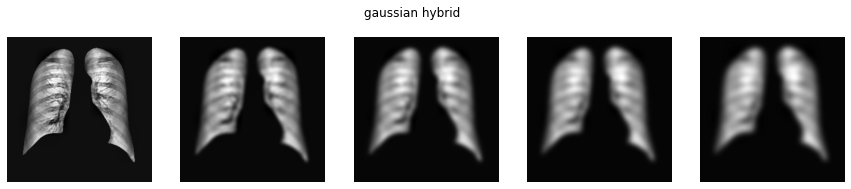

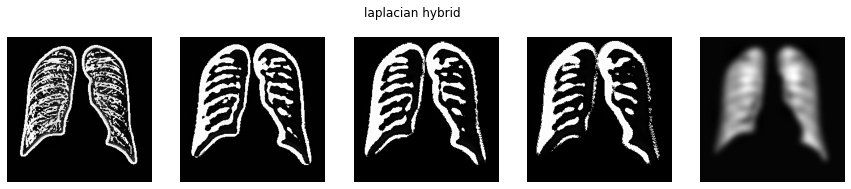

In [28]:
imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
denoised = cv.fastNlMeansDenoising(imgs_to_process[0], h=denoising_h)
denoised_clahe_enhanced = clahe.apply(denoised)

gs_h, ls_h = plib.gaussian_and_laplacian_stack(denoised_clahe_enhanced, 5)

plib.visualize_stack(gs_h, title='gaussian hybrid')
plib.visualize_stack(ls_h, title='laplacian hybrid')

### Gabor Filters

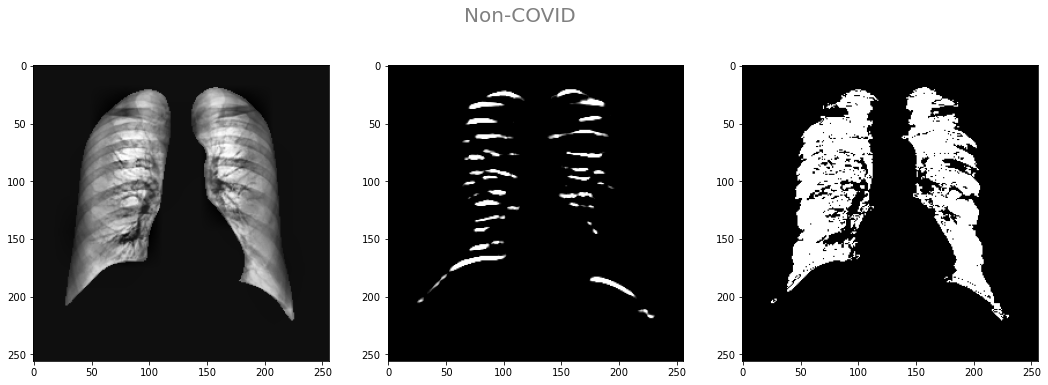

In [30]:

g_kernel = cv.getGaborKernel((11,11), 8, np.pi/2, 10.0, 0.5, 0, ktype=cv.CV_32F)


filtered_img = cv.filter2D(denoised_clahe_enhanced, cv.CV_8UC3, g_kernel)
corrected_img = denoised_clahe_enhanced-filtered_img
plot_images([denoised_clahe_enhanced, filtered_img, cv.normalize(corrected_img, dst=corrected_img, alpha=0.0, beta=1.0, norm_type=cv.NORM_MINMAX)], "Non-COVID")

# REF: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3347229/
# https://www.sciencedirect.com/science/article/pii/S1361841505000988